In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import SequenceMatcher

<h2>데이터 전처리 작업</h2>

In [103]:
cosme = pd.read_csv(r"C:\cosmetic.csv")
cosme.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,asin,text,title,location_and_date,verified,rating
0,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Cyclohexasiloxane, Squalane, Bis-Peg-18 Methyl...",1,1,1,1,1,B07V2PHS4J,"Very thick, rich, and creamy. Hesitated on th...",My new favorite purchase,"Reviewed in the United States on October 30, 2023",True,5
1,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Cyclohexasiloxane, Squalane, Bis-Peg-18 Methyl...",1,1,1,1,1,B07V2PHS4J,Combined it with foundation cream for a lighte...,Good moisturizing,"Reviewed in the United States on September 28,...",True,4
2,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Cyclohexasiloxane, Squalane, Bis-Peg-18 Methyl...",1,1,1,1,1,B07V2PHS4J,A small jar of this was given to me as part of...,I will no longer buy any other face cream.,"Reviewed in the United States on November 4, 2023",True,5
3,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Cyclohexasiloxane, Squalane, Bis-Peg-18 Methyl...",1,1,1,1,1,B07V2PHS4J,"Works well, but man, it is painfully expensive...",Expensive,"Reviewed in the United States on September 21,...",True,4
4,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Cyclohexasiloxane, Squalane, Bis-Peg-18 Methyl...",1,1,1,1,1,B07V2PHS4J,Kiehl's started with a pharmacy background and...,Ultra Facial Cream,"Reviewed in the United States on October 17, 2023",True,5


In [104]:
cosme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Label              682 non-null    object 
 1   Brand              682 non-null    object 
 2   Name               682 non-null    object 
 3   Price              682 non-null    int64  
 4   Rank               682 non-null    float64
 5   Ingredients        682 non-null    object 
 6   Combination        682 non-null    int64  
 7   Dry                682 non-null    int64  
 8   Normal             682 non-null    int64  
 9   Oily               682 non-null    int64  
 10  Sensitive          682 non-null    int64  
 11  asin               682 non-null    object 
 12  text               681 non-null    object 
 13  title              682 non-null    object 
 14  location_and_date  682 non-null    object 
 15  verified           682 non-null    bool   
 16  rating             682 non

In [105]:
cosme['Combination'] = cosme['Combination'].astype(object)
cosme['Dry'] = cosme['Combination'].astype(object)
cosme['Normal'] = cosme['Combination'].astype(object)
cosme['Oily'] = cosme['Combination'].astype(object)
cosme['Sensitive'] = cosme['Combination'].astype(object)
cosme = cosme.dropna(subset=['text'])
cosme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 681
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Label              681 non-null    object 
 1   Brand              681 non-null    object 
 2   Name               681 non-null    object 
 3   Price              681 non-null    int64  
 4   Rank               681 non-null    float64
 5   Ingredients        681 non-null    object 
 6   Combination        681 non-null    object 
 7   Dry                681 non-null    object 
 8   Normal             681 non-null    object 
 9   Oily               681 non-null    object 
 10  Sensitive          681 non-null    object 
 11  asin               681 non-null    object 
 12  text               681 non-null    object 
 13  title              681 non-null    object 
 14  location_and_date  681 non-null    object 
 15  verified           681 non-null    bool   
 16  rating             681 non

In [106]:
cosme['text']

0      Very thick, rich, and creamy.  Hesitated on th...
1      Combined it with foundation cream for a lighte...
2      A small jar of this was given to me as part of...
3      Works well, but man, it is painfully expensive...
4      Kiehl's started with a pharmacy background and...
                             ...                        
677    I tried this product daily for about 2 weeks.P...
678    I’m Not sure what all the Debbie downers are g...
679    I'm still learning how to use this product but...
680    This stuff is amazing! I am ,or was very self-...
681    After playing around with it a while, I figure...
Name: text, Length: 681, dtype: object

In [107]:
cosmetic = cosme.copy()
cosmetic = cosmetic.drop_duplicates(subset=['asin'])
cosmetic = cosmetic[['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'asin']]
cosmetic.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,asin
0,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Cyclohexasiloxane, Squalane, Bis-Peg-18 Methyl...",1,1,1,1,1,B07V2PHS4J
10,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Pentyl...",1,1,1,1,1,B0716YHHNH
20,Moisturizer,CLINIQUE,Moisture Surge 72-Hour Auto-Replenishing Hydrator,39,4.4,"Dimethicone, Trisiloxane, Trehalose, Sucrose, ...",1,1,1,1,1,B08PK8G9XM
28,Moisturizer,BAREMINERALS,COMPLEXION RESCUE™ Tinted Moisturizer Broad Sp...,30,3.9,"Coconut Alkanes, Propanediol, Squalane, Trehal...",0,0,0,0,0,B00S560WPE
38,Moisturizer,DRUNK ELEPHANT,The Littles™,90,4.4,"Sodium Lauroyl Methyl Isethionate, Cocamidopro...",1,1,1,1,1,B0B3YD19DS


In [108]:
cosmetic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 673
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        71 non-null     object 
 1   Brand        71 non-null     object 
 2   Name         71 non-null     object 
 3   Price        71 non-null     int64  
 4   Rank         71 non-null     float64
 5   Ingredients  71 non-null     object 
 6   Combination  71 non-null     object 
 7   Dry          71 non-null     object 
 8   Normal       71 non-null     object 
 9   Oily         71 non-null     object 
 10  Sensitive    71 non-null     object 
 11  asin         71 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.2+ KB


<h2>주요 특성(브랜드, 평점, 가격) 분포 시각화</h2>

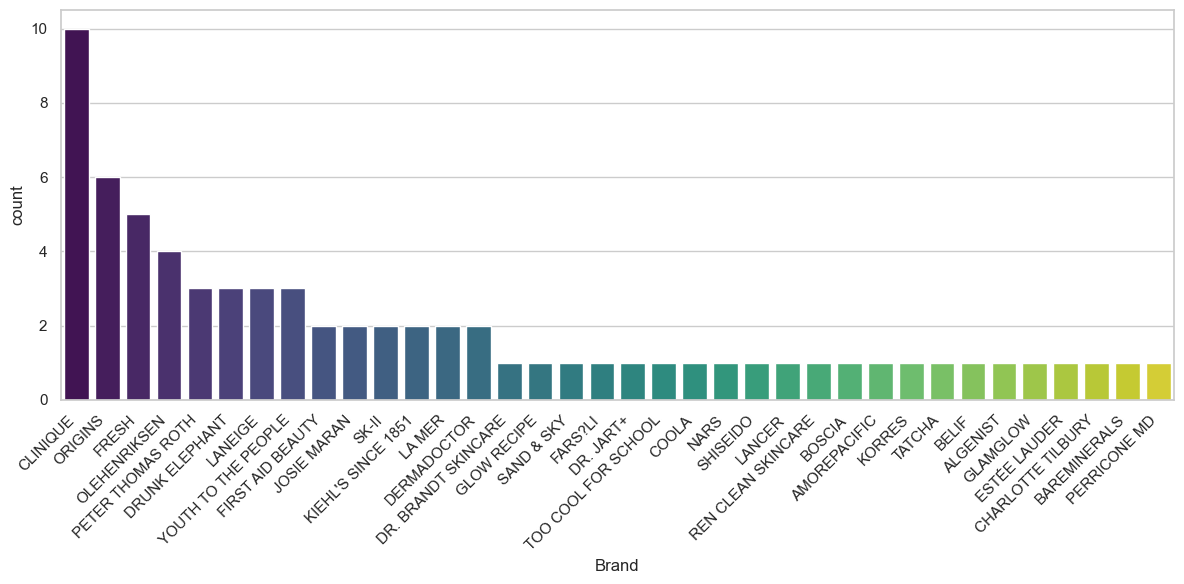

In [109]:
# seaborn의 스타일 설정
sns.set(style="whitegrid")

# 히스토그램 작성
plt.figure(figsize=(12, 6))
sns.countplot(data=cosmetic, x='Brand', order=cosmetic['Brand'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

# 플롯 표시
plt.show()

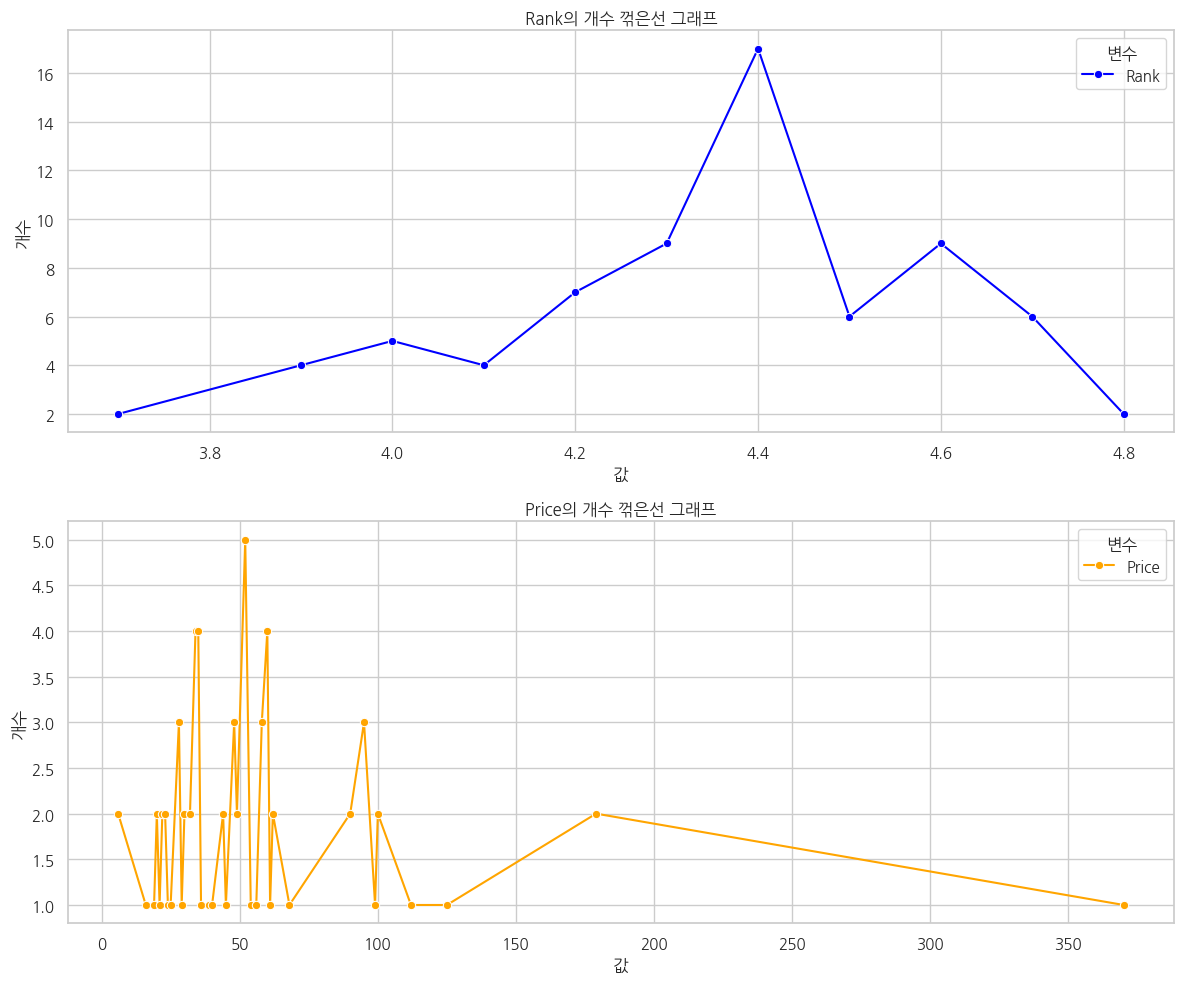

In [110]:
# seaborn의 스타일 설정
sns.set(style="whitegrid")

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 나눔고딕 폰트 사용 (설치 필요)

# Rank와 Price의 개수 계산
rank_counts = cosmetic['Rank'].value_counts().sort_index()
price_counts = cosmetic['Price'].value_counts().sort_index()

# 그래프 크기 설정
plt.figure(figsize=(12, 10))

# Rank 개수의 꺾은선 그래프 표시 (subplot 1)
plt.subplot(2, 1, 1)
sns.lineplot(x=rank_counts.index, y=rank_counts.values, marker='o', label='Rank', color='blue')
plt.title('Rank의 개수 꺾은선 그래프')
plt.xlabel('값')
plt.ylabel('개수')
plt.legend(title='변수', loc='upper right')

# Price 개수의 꺾은선 그래프 표시 (subplot 2)
plt.subplot(2, 1, 2)
sns.lineplot(x=price_counts.index, y=price_counts.values, marker='o', label='Price', color='orange')
plt.title('Price의 개수 꺾은선 그래프')
plt.xlabel('값')
plt.ylabel('개수')
plt.legend(title='변수', loc='upper right')

# 그래프 표시
plt.tight_layout()
plt.show()

<h2>입력 문자열에 대해 Text와 Title에 대한 유사도가 가장 높은 문자열을 출력</h2>

In [111]:
texts = cosme['text'].tolist()
titles = cosme['title'].tolist()

# 각각의 열에 대해 별도의 TF-IDF 벡터화 객체 생성
tfidf_vectorizer_text = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_vectorizer_title = TfidfVectorizer(max_features=1000, stop_words='english')

# TF-IDF 행렬 생성
tfidf_matrix_text = tfidf_vectorizer_text.fit_transform(texts)
tfidf_matrix_title = tfidf_vectorizer_title.fit_transform(titles)

# TF-IDF 행렬을 데이터프레임으로 변환
#tfidf_df_text = pd.DataFrame(tfidf_matrix_text.toarray(), columns=tfidf_vectorizer_text.get_feature_names_out())
#tfidf_df_title = pd.DataFrame(tfidf_matrix_title.toarray(), columns=tfidf_vectorizer_title.get_feature_names_out())


In [112]:
query_string = 'my skin looks fresh and moist'

# TF-IDF 벡터화
query_vector_text = tfidf_vectorizer_text.transform([query_string])

# 자카드 유사도 계산
jaccard_similarities = []
for text in texts:
    set1 = set(query_string.split())
    set2 = set(text.split())
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    similarity = intersection / union
    jaccard_similarities.append(similarity)

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(query_vector_text, tfidf_matrix_text)

# 가장 높은 자카드 유사도를 가진 행의 인덱스 찾기
max_jaccard_index = max(range(len(jaccard_similarities)), key=jaccard_similarities.__getitem__)
# 가장 높은 코사인 유사도를 가진 행의 인덱스 찾기
max_cosine_index = cosine_similarities.argmax()

# 가장 유사한 행의 문자열 출력
most_similar_jaccard_string = texts[max_jaccard_index]
most_similar_jaccard_similarity = round(jaccard_similarities[max_jaccard_index], 4)
most_similar_cosine_string = texts[max_cosine_index]
most_similar_cosine_similarity = round(cosine_similarities[0][max_cosine_index], 4)

# Sequence Matcher(Modified Levenshtein Distance)
dict_s = {}
for j in texts:
    matcher = SequenceMatcher(None, query_string, j)
    sim = matcher.ratio()
    if not dict_s:
        dict_s[j] = sim
    elif dict_s and dict_s[next(iter(dict_s))] < sim:
        del dict_s[next(iter(dict_s))]
        dict_s[j] = sim

print(f"원본 문자열: {query_string}")
print(f"가장 유사한 자카드 유사도를 가진 행의 문자열: {most_similar_jaccard_string}({most_similar_jaccard_similarity})")
print(f"가장 유사한 코사인 유사도를 가진 행의 문자열: {most_similar_cosine_string}({most_similar_cosine_similarity})")
print(f"SequenceMatcher 알고리즘의 유사도가 가장 높은 문자열: {next(iter(dict_s))}({round(dict_s[next(iter(dict_s))], 4)})")

원본 문자열: my skin looks fresh and moist
가장 유사한 자카드 유사도를 가진 행의 문자열: my skin gets a nice glow and looks fresh and moist.(0.4545)
가장 유사한 코사인 유사도를 가진 행의 문자열: it is fresh(0.7181)
SequenceMatcher 알고리즘의 유사도가 가장 높은 문자열: my skin gets a nice glow and looks fresh and moist.(0.725)


In [113]:
query_string = 'my favorite item'

# TF-IDF 벡터화
query_vector_title = tfidf_vectorizer_title.transform([query_string])

# 자카드 유사도 계산
jaccard_similarities = []
for title in titles:
    set1 = set(query_string.split())
    set2 = set(title.split())
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    similarity = intersection / union
    jaccard_similarities.append(similarity)

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(query_vector_title, tfidf_matrix_title)

# 가장 높은 자카드 유사도를 가진 행의 인덱스 찾기
max_jaccard_index = max(range(len(jaccard_similarities)), key=jaccard_similarities.__getitem__)
# 가장 높은 코사인 유사도를 가진 행의 인덱스 찾기
max_cosine_index = cosine_similarities.argmax()

# 가장 유사한 행의 문자열 출력
most_similar_jaccard_string = titles[max_jaccard_index]
most_similar_jaccard_similarity = round(jaccard_similarities[max_jaccard_index], 4)
most_similar_cosine_string = titles[max_cosine_index]
most_similar_cosine_similarity = round(cosine_similarities[0][max_cosine_index], 4)

# Sequence Matcher(Modified Levenshtein Distance)
dict_s = {}
for j in titles:
    matcher = SequenceMatcher(None, query_string, j)
    sim = matcher.ratio()
    if not dict_s:
        dict_s[j] = sim
    elif dict_s and dict_s[next(iter(dict_s))] < sim:
        del dict_s[next(iter(dict_s))]
        dict_s[j] = sim

print(f"원본 문자열: {query_string}")
print(f"가장 유사한 자카드 유사도를 가진 행의 문자열: {most_similar_jaccard_string}({most_similar_jaccard_similarity})")
print(f"가장 유사한 코사인 유사도를 가진 행의 문자열: {most_similar_cosine_string}({most_similar_cosine_similarity})")
print(f"SequenceMatcher 알고리즘의 유사도가 가장 높은 문자열: {next(iter(dict_s))}({round(dict_s[next(iter(dict_s))], 4)})")

원본 문자열: my favorite item
가장 유사한 자카드 유사도를 가진 행의 문자열: One of my favorite cleansers(0.3333)
가장 유사한 코사인 유사도를 가진 행의 문자열: My Favorite(0.5614)
SequenceMatcher 알고리즘의 유사도가 가장 높은 문자열: My favorite night cream(0.7692)
